# Stroke Prediction Classification


### **Introduction:**

The 5th highest cause of death and the leading cause of disability in the United States is due in part to strokes (Cerebrovascular Accidents). Strokes are the result of an insufficient supply of oxygen and nutrients to the brain due to a blood vessel bursting. Subsequently, brain cells die, which can often cause right-sided weakness/paralysis, and sensory impairment.

This prediction classification project will answer the question of whether or not someone is likely to experience a stroke based on 8 different core factors relating to health and demographic.

The “Stroke Prediction Dataset”, acquired from kaggle.com, contains 12 columns, including different factors that may affect someone’s likelihood of experiencing a stroke, as well as whether or not the patient experienced a stroke, and other patient information.

In [30]:
library(repr)
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
library(ggplot2)
options(repr.matrix.max.rows = 6)

### **Preliminary exploratory data analysis:**

In [2]:
url <- "https://raw.githubusercontent.com/romansinkus/DS_Group_Project/main/healthcare-dataset-stroke-data.csv"
untidy_stroke_data <- read_csv(url)
stroke_data <- untidy_stroke_data %>%
    select(-id) %>% 
    mutate(stroke = as_factor(stroke)) %>%
    mutate(bmi = as.numeric(bmi)) %>% 
    mutate(heart_disease = as_factor(heart_disease)) %>%
    mutate(Residence_type = as_factor(Residence_type)) %>%
    mutate(smoking_status = as_factor(smoking_status)) %>%
    mutate(work_type = as_factor(work_type)) %>%
    mutate(gender = as_factor(gender)) %>%
    mutate(ever_married = as_factor(ever_married)) %>%
    mutate(hypertension = as_factor(hypertension)) %>% 
    rename(residence_type = Residence_type) %>%
    filter(bmi > 10 & bmi < 50)

stroke_data

Parsed with column specification:
cols(
  id = col_double(),
  gender = col_character(),
  age = col_double(),
  hypertension = col_double(),
  heart_disease = col_double(),
  ever_married = col_character(),
  work_type = col_character(),
  Residence_type = col_character(),
  avg_glucose_level = col_double(),
  bmi = col_character(),
  smoking_status = col_character(),
  stroke = col_double()
)

Warning message:
“Problem with `mutate()` input `bmi`.
ℹ NAs introduced by coercion
ℹ Input `bmi` is `as.numeric(bmi)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>
Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
Female,44,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [3]:
stroke_split <- initial_split(stroke_data, prop = 0.75, strata = stroke)
stroke_train <- training(stroke_split)
stroke_test <- testing(stroke_split)

In [4]:
avg_values <- stroke_train %>% 
    summarize(age_avg = mean(age, na.rm = TRUE),
            avg_glucose_level_avg = mean(avg_glucose_level, na.rm = TRUE),
            bmi_avg = mean(bmi, na.rm = TRUE))

avg_values

age_avg,avg_glucose_level_avg,bmi_avg
<dbl>,<dbl>,<dbl>
42.95732,104.6882,28.3987


In [5]:
categorical_values <- stroke_train %>%
    group_by(stroke) %>% 
    summarize(n = n())

categorical_values

`summarise()` ungrouping output (override with `.groups` argument)



stroke,n
<fct>,<int>
0,3476
1,147


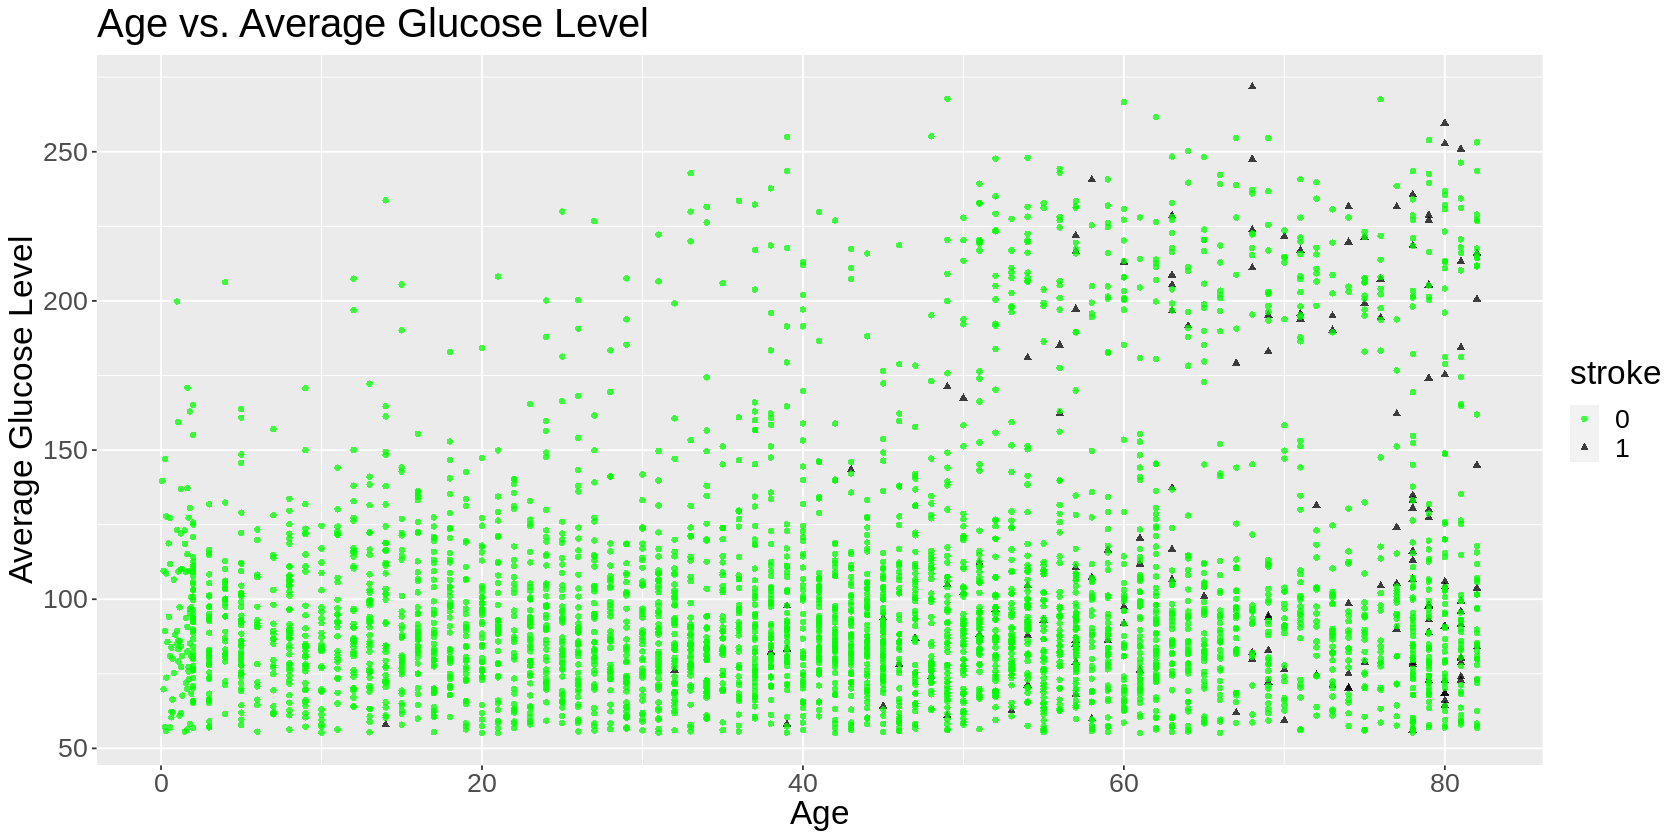

In [39]:
options(repr.plot.width = 14, repr.plot.height = 7)

age_vs_avg_glucose_level_plot <- stroke_train %>% 
    ggplot(aes(x = age, y = avg_glucose_level))+
    geom_point(aes(color = stroke, shape = stroke), alpha = 0.75)+
    labs(x = "Age", y = "Average Glucose Level", fill = "Stroke")+
    ggtitle("Age vs. Average Glucose Level")+
    theme(text = element_text(size = 20))+
    #scale_fill_brewer(palette = "Set2")
    scale_colour_manual(values = c("green", "black"))

age_vs_avg_glucose_level_plot

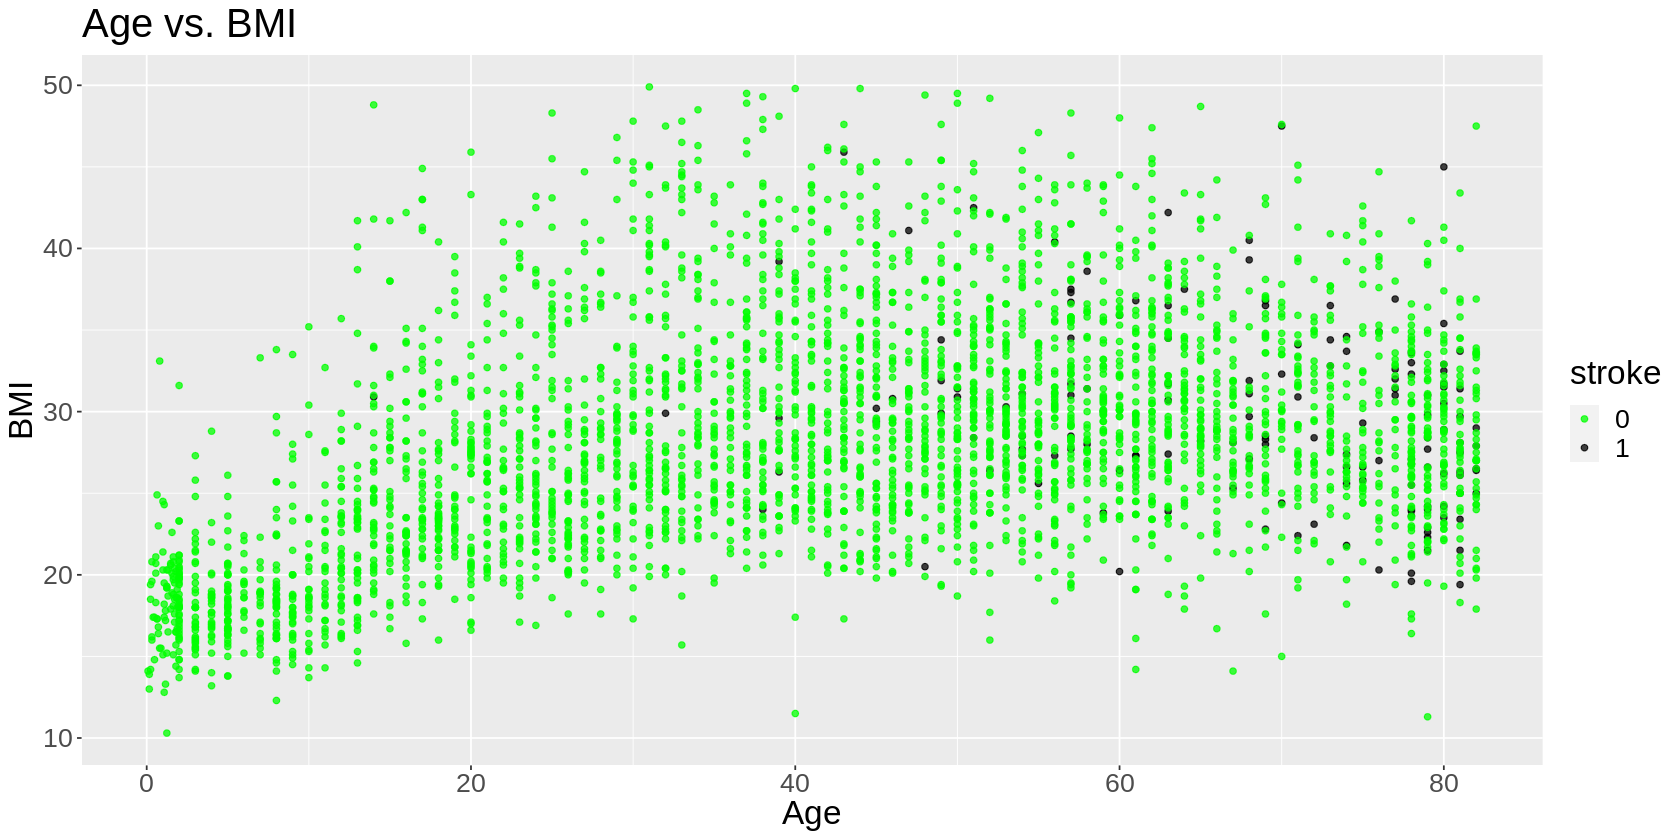

In [40]:
options(repr.plot.width = 14, repr.plot.height = 7)

age_vs_bmi_plot <- stroke_train %>% 
    ggplot(aes(x = age, y = bmi))+
    geom_point(aes(color = stroke), alpha = 0.75)+
    labs(x = "Age", y = "BMI", fill = "Stroke")+
    ggtitle("Age vs. BMI")+
    theme(text = element_text(size = 20))+
    scale_colour_manual(values = c("green", "black"))

age_vs_bmi_plot

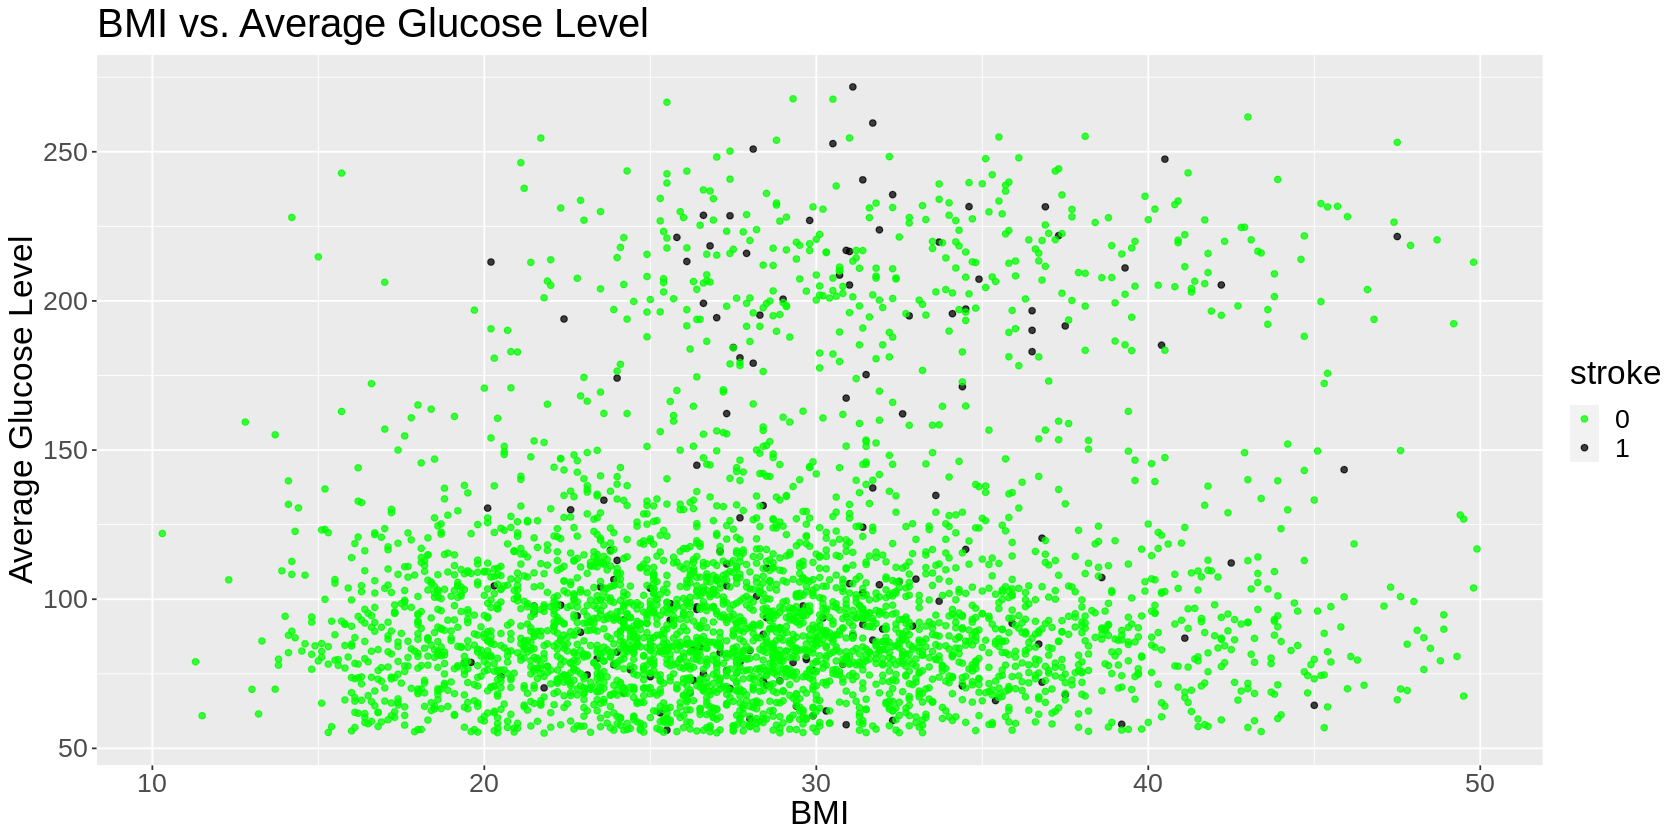

In [41]:
bmi_vs_avg_glucose_level_plot <- stroke_train %>% 
    ggplot(aes(x = bmi, y = avg_glucose_level))+
    geom_point(aes(color = stroke), alpha = 0.75)+
    labs(x = "BMI", y = "Average Glucose Level", fill = "Stroke")+
    ggtitle("BMI vs. Average Glucose Level")+
    theme(text = element_text(size = 20))+
    scale_colour_manual(values = c("green", "black"))

bmi_vs_avg_glucose_level_plot

### **Methods:**

We will be using the variables that could possibly have a direct or indirect effect on strokes, containing a combination of categorical variables, discrete variables, and continuous variables. We will be observing the gender, age, hypertension, heart disease, residence type, average glucose level, body mass index, and smoking status of individuals to predict whether they are more likely to have a stroke. 

The data was already tidy, since each row had a single observation, each column had a single variable and each value was in a single cell. However, we removed some redundant columns that were not needed in our analysis such as id, if the patient was ever married and the work type since they were not directly related or as important as other factors.

Describe at least one way that you will visualize the results:


### **Expected Outcomes and Significance:**

We expect to find a trend that can help determine if a patient is more likely to suffer from a stroke. This depends on several factors in question, based on a patient’s health or living habits or demographics. For example, smoking, having a heart disease or living in a polluted area would lead to higher chances of a stroke. 

What impact could such findings have?

Using this prediction, predicting a stroke would be an easier and more efficient process. It could help many patients seek help at an early stage, to prevent serious outcomes from occuring.

**Future Questions:**